In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from scipy.spatial.distance import squareform
from scipy.misc import imread
import pandas as pd
import matplotlib.cm as cm
from scipy import ndimage, misc
import pickle

import glob
import PIL
from PIL import Image



In [2]:
import sys
sys.path.append("..")

from src.standardizer import Standardizer

In [3]:
RESIZED_DIRECTORY = '../data/resized'

In [4]:
ruled_imgs = glob.glob('../Sketches/Ruled/*')

In [6]:
ruled_arr = []
for a in ruled_imgs:
    try:
        ruled_arr.append(imread(a))
    except:
        continue
        

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


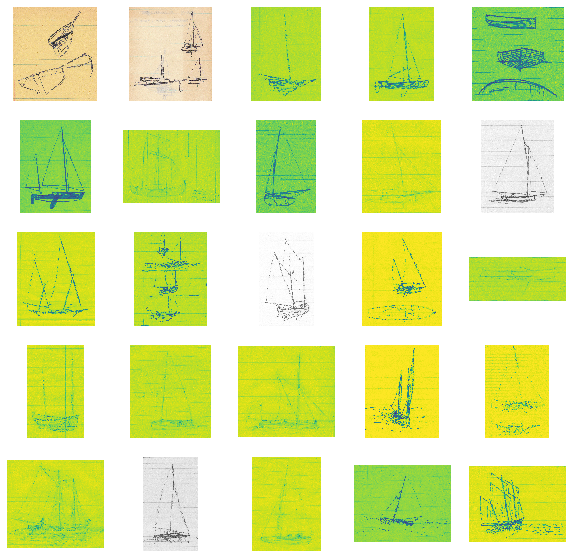

In [8]:
fig, ax = plt.subplots(5, 5, figsize = (10, 10))
for i, a in enumerate(ax.flatten()):
    a.imshow(ruled_arr[i])
    a.axis('off')

In [11]:
greyscale_imgs = []
for img in ruled_imgs:
    try:
        x = imread(img, mode='L')
        greyscale_imgs.append(x)
    except:
        continue
   


/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [12]:
greyscale_imgs = np.array(greyscale_imgs)

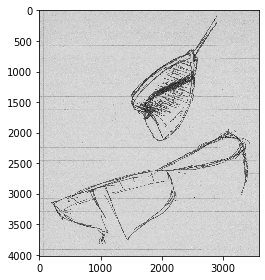

In [13]:
io.imshow(greyscale_imgs[0])

In [14]:
greyscale_imgs[0].shape

(4017, 3590)

In [15]:
widths = []
heights = []
aspect_ratios = []
for img in greyscale_imgs:
    try:
        widths.append(img.shape[0])
        heights.append(img.shape[1])
        aspect_ratios.append(img.shape[0]/img.shape[1])
    except:
        continue

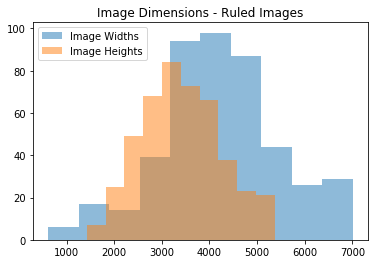

In [16]:
fig, ax = plt.subplots()
ax.hist(widths, alpha = 0.5, label = 'Image Widths')
ax.hist(heights, alpha = 0.5, label = 'Image Heights')
ax.set_title('Image Dimensions - Ruled Images')
ax.legend()

Text(0.5, 1.0, 'Image Aspect Ratios - Ruled Images')

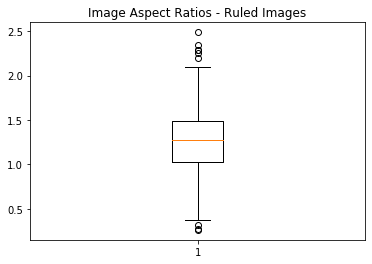

In [17]:
fig, ax = plt.subplots()
ax.boxplot(aspect_ratios)
ax.set_title('Image Aspect Ratios - Ruled Images')

In [18]:
np.mean(aspect_ratios)

1.2649577289157925

In [19]:
def resize(i, img, width=400):
    mywidth = width

    img = Image.open(img)
#     wpercent = (mywidth/float(img.size[0]))
#     hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((mywidth,int(mywidth*1.26)), PIL.Image.ANTIALIAS)
    img.save('../data/resized/{}_img.png'.format(i))

In [20]:
for i, img in enumerate(ruled_imgs):
    try:
        resize(i, img)
    except:
        continue
    

In [21]:
resized_imgs = glob.glob('../data/resized/*')

In [22]:
print(len(resized_imgs))

0


In [23]:
img_list = [164, 202, 425, 345, 139, 72, 311, 363, 403, 509, 362, 257, 175, 203, 47, 183, 0, 297, 34, 8, 320, 197, 293, 450, 215, 28, 74]

In [24]:
img_subset = []
for img in resized_imgs:
    img_idx = int(img.split('/')[3].split('_')[0])
    if img_idx in img_list:
        img_subset.append(img)

In [25]:
img_subset

[]

In [26]:
standardizer_subset = Standardizer(img_subset, resized_imgs[3])
standardizer_full = Standardizer(resized_imgs, resized_imgs[3])

IndexError: list index out of range

In [ ]:
for i in range(len(img_subset)):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(standardizer_subset.binarized_images[i], cmap='gray')
    ax[1].imshow(standardizer_subset.greyscale_image_list[i], cmap='gray')
    ax[0].set_title(standardizer_subset.image_list[i])
    plt.show()
    print(standardizer_subset.greyscale_image_list[i].shape)

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, a in enumerate(ax.flatten()):
    a.imshow(standar)

In [ ]:
mean_pixel_values_subset = np.zeros((504, 400))
mean_pixel_values_full = np.zeros((504, 400))

In [42]:
for i in range(504):
    for j in range(400):
        mean_pixel_values_subset[i, j] = np.mean(standardizer_subset.greyscale_image_list[:, i, j])
        mean_pixel_values_full[i, j] = np.mean(standardizer_full.greyscale_image_list[:, i, j])

Text(0.5, 1.0, 'Mean Pixel Values - Subset')

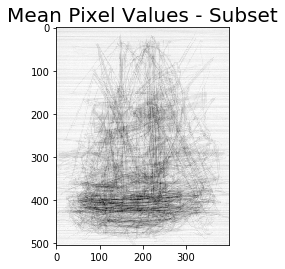

In [43]:
plt.imshow(mean_pixel_values_subset, cmap='gray')
plt.title('Mean Pixel Values - Subset', fontsize = 20)

Text(0.5, 1.0, 'Mean Pixel Values - Full')

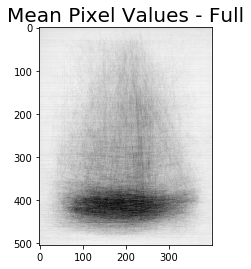

In [44]:
plt.imshow(mean_pixel_values_full, cmap='gray')
plt.title('Mean Pixel Values - Full', fontsize = 20)